In [1]:
# Import libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import SGDRegressor

## generate random data

In [2]:
X = 10 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

## plot generated data

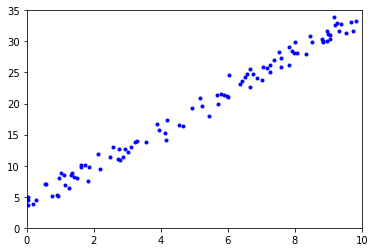

In [3]:
plt.plot(X, y, "b.")
plt.axis([0, 10, 0, 35])
plt.show()

## some helper functions and classes

In [31]:
class line:
    def __init__(self, b, m):
        self.b = b
        self.m = m

    def get_value(self, x):
        return self.b + self.m * x


def compute_error(prediction_function, X, y):
    total_error = 0

    for i in range(0, len(X)):
        prediction = prediction_function(X[i].reshape(1, -1))[0]
        total_error += (y[i][0] - prediction)**2

    return total_error / float(len(X))


def get_m_and_b_from_model(model):
    return model.coef_[0], model.intercept_[0]


def generate_cost_function_mesh(X, y):
    ms = np.linspace(1.0, 5.0, 20)
    bs = np.linspace(-5.0, 5.0, 20)

    M, B = np.meshgrid(ms, bs)
    zs = np.array([compute_error(line(bp, mp).get_value, X, y) for mp, bp in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)

    return (M, B, Z)


### Model training ##ä

def fit_line(X, y, max_iter, learning_rate):
    model = SGDRegressor(max_iter=max_iter, learning_rate="constant", eta0=learning_rate)
    model.fit(X.reshape(-1, 1), np.ravel(y))
    y_preds = model.predict(X.reshape(-1, 1))
    return (model, [min(X)[0], max(X)[0]], [min(y_preds), max(y_preds)])


### PLOTTING ###

def plot_cost_function(M, B, Z, m, b, z):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, rstride=1, cstride=1, cmap=cm.coolwarm, alpha=0.9)

    if m and b and z:
        ax.scatter(m, b, z, color="red", linewidth=1)

    ax.set_xlabel('m')
    ax.set_ylabel('b')
    ax.set_zlabel('error')

    plt.show()

def plot_points_and_regression_line(X, y, X_pred, y_pred):
    plt.plot(X, y, "b.")
    plt.axis([0, 10, 0, 35])
    plt.plot(X_pred, y_pred, color='red')
    plt.show()


def plot_cost_history(cost, epoch=None):
    x = range(0, len(cost))
    plt.scatter(x, cost)
    if epoch: 
        plt.scatter(epoch, cost[epoch], marker="x", s=100, linewidth=2)
    plt.show()


def plot_all(X, y, predictions, M, B, Z, m, b, cost, epoch):
    X_pred, y_pred = predictions[epoch][0], predictions[epoch][1]

    fig = plt.figure(figsize=(25, 8))
    
    # plot linear regression
    ax0 = fig.add_subplot(1, 3, 1)
    ax0.plot(X, y, "b.")
    ax0.axis([0, 10, 0, 35])
    ax0.plot(X_pred, y_pred, color='red')
    ax0.set_xlabel('x')
    ax0.set_ylabel('y')

    # plot cost per epoch
    ax1 = fig.add_subplot(1, 3, 2)
    x_cost = range(0, len(cost))
    ax1.scatter(x_cost, cost)
    ax1.scatter(epoch, cost[epoch], marker="x", s=100, linewidth=2)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('cost')

    # plot 3d cost function
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.plot_surface(M, B, Z, rstride=1, cstride=1, cmap=cm.coolwarm, alpha=0.9)
    ax3.scatter(m[epoch], b[epoch], cost[epoch], marker="x", s=100, color="red", linewidth=3)
    ax3.scatter(m, b, cost, color="blue", linewidth=2 , alpha=0.9)
    ax3.set_xlabel('m')
    ax3.set_ylabel('b')
    ax3.set_zlabel('error')

    plt.show()


In [21]:
M, B, Z = generate_cost_function_mesh(X, y)

## create data for epochs

In [ ]:
predictions = []
ms = []
bs = []
cost = []

learning_rate = 0.00001
for i in range(1, 201, 5):
    (model, X_pred, y_pred) = fit_line(X, y, i, learning_rate)
    predictions.append((X_pred, y_pred))
    m, b = get_m_and_b_from_model(model)
    ms.append(m)
    bs.append(b)
    cost.append(compute_error(model.predict, X, y))

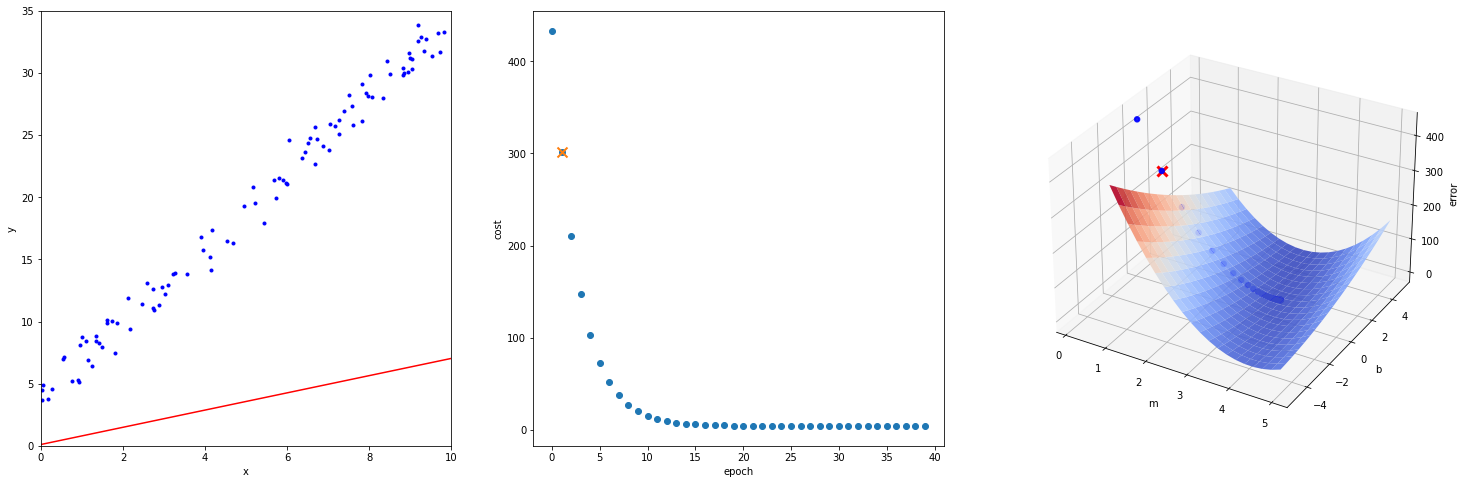

In [32]:
epoch = 1
plot_all(X, y, predictions, M, B, Z, ms, bs, cost, epoch)